## <center>Project Exercise </center>

### GOAL: Figure out which handwritten digits are most differentiated with PCA.

Imagine you are working on an image recognition service for a postal service. It would be very useful to be able to read in the digits automatically, even if they are handwritten. (Quick note, this is very much how modern postal services work for a long time now and its actually more accurate than a human). The manager of the postal service wants to know which handwritten numbers are the hardest to tell apart, so he can focus on getting more labeled examples of that data. You will have a dataset of hand written digits (a very famous data set) and you will perform PCA to get better insight into which numbers are easily separable from the rest.

### Data

    Background:

    E. Alpaydin, Fevzi. Alimoglu
    Department of Computer Engineering
    Bogazici University, 80815 Istanbul Turkey
    alpaydin '@' boun.edu.tr


#### Data Set Information from Original Authors:

We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds.

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input devices, but subjects are not aware of this.

SOURCE: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

**Complete the Tasks in bold below.**

### Data loading and exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
digits = pd.read_csv('C:/Users/Lenovo/Desktop/Python/Machine Learning/Unsupervised Learning/Principal Component Analysis/Data Sets/digits.csv')
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


**TASK: Create a new DataFrame called *pixels* that consists only of the pixel feature values by dropping the number_label column.**

In [3]:
pixels = digits.drop(columns="number_label")

### Displaying an Image

**TASK: Grab a single image row representation by getting the first row of the pixels DataFrame.**

In [4]:
im1 = pixels.iloc[0, :]
im1

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

**TASK: Convert this single row Series into a numpy array.**

In [5]:
vals = im1.values

**TASK: Reshape this numpy array into an (8,8) array.**

In [6]:
vals = vals.reshape(8,8)

**TASK: Use Matplotlib or Seaborn to display the array as an image representation of the number drawn. Remember your palette or cmap choice would change the colors, but not the actual pixel values.**

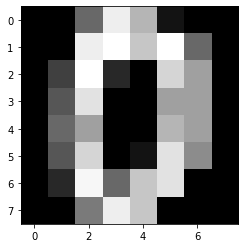

In [7]:
plt.imshow(vals, cmap=cm.Greys_r);

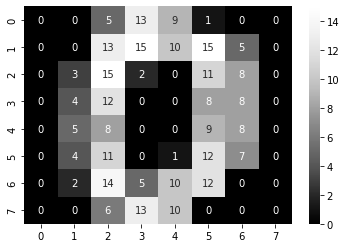

In [8]:
sns.heatmap(vals, annot=True, cmap=cm.Greys_r);

### PCA

**TASK: Use Scikit-Learn to scale the pixel feature dataframe.**

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaled_pixels = scaler.fit_transform(pixels)

**TASK: Perform PCA on the scaled pixel data set with 2 components.**

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_pixels)

**TASK: How much variance is explained by 2 principal components.**

In [13]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [14]:
np.sum(pca.explained_variance_ratio_)

0.2159497049184148

**TASK: Create a scatterplot of the digits in the 2 dimensional PCA space, color/label based on the original number_label column in the original dataset.**

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


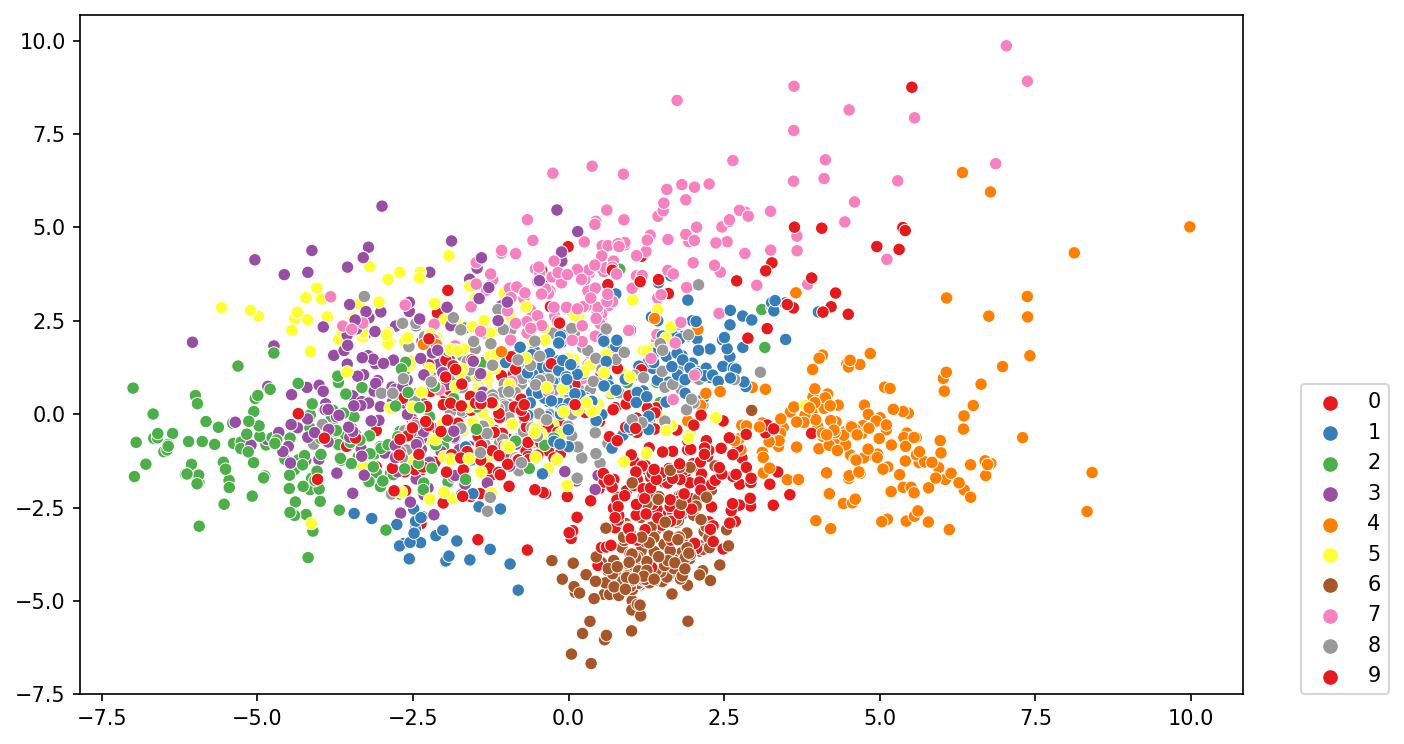

In [15]:
plt.figure(figsize=(10,6),dpi=150)
labels = digits['number_label'].values
sns.scatterplot(principal_components[:,0],principal_components[:,1],hue=labels,palette='Set1')
plt.legend(loc=(1.05,0));

**TASK: Which numbers are the most "distinct"?**

Label #4 as being the most separated group, implying its the most distinct, similar situation for #2, #6 and #9.

### Bonus Challenge 

**TASK: Create an "interactive" 3D plot of the result of PCA with 3 principal components.**

In [16]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_pixels)

In [17]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415])

In [18]:
np.sum(pca.explained_variance_ratio_)

0.30039385377829975

In [19]:
df = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2", "PCA3"])
df["labels"] = digits['number_label'].values

In [20]:
import plotly.express as px
fig = px.scatter_3d(df, x='PCA1', y='PCA2', z='PCA3',
              color='labels', size_max=18,
              opacity=0.7)
fig.show()